In [126]:
from collections.abc import Sequence, Iterable, Callable
from typing import Union

import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Sparse matrix in python

### standard CSC representation

In [4]:
indptr = np.array([0, 2, 3, 6])
# index = indices[0:2] indices[2:3] indices[3:6]
# data = data[0:2] ...
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

In [8]:
a = sparse.csc_matrix((data, indices, indptr), shape=(3, 3))
print(a)
a.toarray()

  (0, 0)	1
  (2, 0)	2
  (2, 1)	3
  (0, 2)	4
  (1, 2)	5
  (2, 2)	6


array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]])

### Another way

In [17]:
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
a = sparse.csc_matrix((data, (row, col)), shape=(3, 3))
print(a)
a.toarray()

  (0, 0)	1
  (2, 0)	2
  (2, 1)	3
  (0, 2)	4
  (1, 2)	5
  (2, 2)	6


array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]], dtype=int32)

## Dataset 1 sparse level (tune lambda_)

In [52]:
# # deprecated api

# start1 = [0, 150, 500]
# count1 = [100, 150, 300]
# start2 = [0, 1000, 3000]
# count2 = [500, 500, 800]
# start3 = [0, 70, 130]
# count3 = [70, 60, 70]


# def generate_loading_matrix(start: Sequence[int], count: Sequence[int],
#                             noise: bool=True, rho: float=0.5, col: bool=True) -> np.ndarray:
#     k = len(start)
#     index1 = np.concatenate([[i] * count[i] for i in range(k)])  # [0,0,...,1,1,...]
#     index2 = np.concatenate([np.arange(i, i + j) for i, j in zip(start, count)])
#     data = np.ones(sum(count))
#     if col is True:
#         row, col = index2, index1
#     else:
#         row, col = index1, index2
#     result = sparse.csc_matrix((data, (row, col))).toarray()
#     if noise is True:
#         result += rho * np.random.normal(0, 1, result.shape)
#         result[result < 0] = 0
#     return result

# # print(H == generate_loading_matrix(start3, count3, noise=False, col=False))

In [68]:
def generate_loading_matrix(shape: tuple,
                            col2row: Callable[[int], Iterable[int]]=None,
                            row2col: Callable[[int], Iterable[int]]=None,
                            noise: bool=True, rho: float=0.5) -> np.ndarray:
    matrix = np.zeros(shape)
    if col2row is not None:
        for j in range(shape[1]):
            matrix[list(col2row(j)), j] = 1
    else:
        for i in range(shape[0]):
            matrix[i, list(row2col(i))] = 1
    
    if noise is True:
        matrix += rho * np.random.normal(0, 1, shape)
        matrix[matrix < 0] = 0
    return matrix

In [69]:
def col2row_1(col_index):
    if col_index == 0:
        return range(0, 100)
    elif col_index == 1:
        return range(150, 300)
    elif col_index == 2:
        return range(500, 800)
    return range(0)

def col2row_2(col_index):
    if col_index == 0:
        return range(0, 500)
    elif col_index == 1:
        return range(1000, 1500)
    elif col_index == 2:
        return range(3000, 3800)
    return range(0)

def row2col(index):
    if index == 0:
        return range(0, 70)
    elif index == 1:
        return range(70, 130)
    elif index == 2:
        return range(130, 200)
    return range(0)

gene_num, loci_number, cell_num, rank = 800, 3800, 200, 3
count_h = [70, 60, 70]
W1 = generate_loading_matrix((gene_num, rank), col2row=col2row_1)
W2 = generate_loading_matrix((gene_num, rank), col2row=col2row_1)
H = generate_loading_matrix((rank, cell_num), row2col=row2col, noise=False)

H

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [119]:
def generate_data_matrix(w: np.ndarray, h: np.ndarray, count_h: Sequence[int],
                         rho: float, lambda_: float,
                         threshold: Union[float, bool]=False) -> np.ndarray:
    X = w @ h
    
    # Gaussian noises
    X += rho * np.random.normal(0, 1, X.shape)
    
    # non-negative or binary
    if threshold is False:
        X[X < 0] = 0
    else:
        X[X <= threshold] = 0
        X[X > threshold] = 1
        
    # dropout
    bernoulli = []
    for i, j in enumerate(count_h):
        expr_level = X[:, sum(count_h[:i]): sum(count_h[:i+1])].mean()
#         print(X.min())
        p = np.exp(-lambda_ * expr_level)
        bernoulli.append(np.random.binomial(1, p, (len(w), j)))
    X[np.concatenate(bernoulli, axis=1) == 1] = 0
        
    # 先dropout再non-negative可以提高稀疏程度
    
    return X

X1s = []
X2s = []
for lambda1 in np.arange(0.25, 0.0, -0.05):
    X1s.append(generate_data_matrix(W1, H, count_h, rho=2, lambda_=lambda1))

for lambda2 in np.arange(0.125, 0.0, -0.025):
    X2s.append(generate_data_matrix(W2, H, count_h, rho=1, lambda_=lambda2, threshold=0.7))

## Dataset 2 noise level (tune rho)

In [71]:
X1s = []
X2s = []
for rho1 in np.arange(3.0, 5.5, 0.5):
    X1s.append(generate_data_matrix(W1, H, count3, rho1, lambda_=0.05))

for rho2 in np.arange(0.2, 1.2, 0.2):
    X2s.append(generate_data_matrix(W2, H, count3, rho2, lambda_=0.025))

## Dataset 3 different transcriptome same epigenome (tune k1)

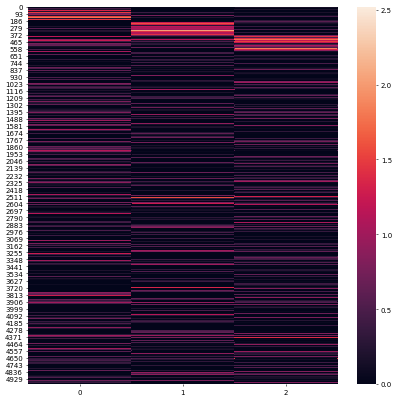

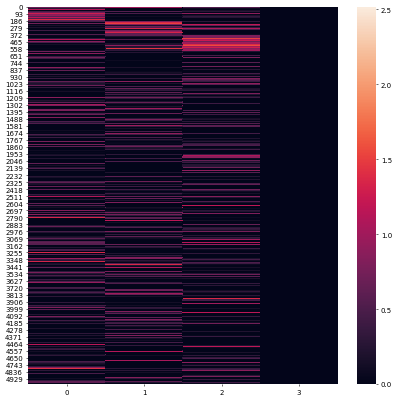

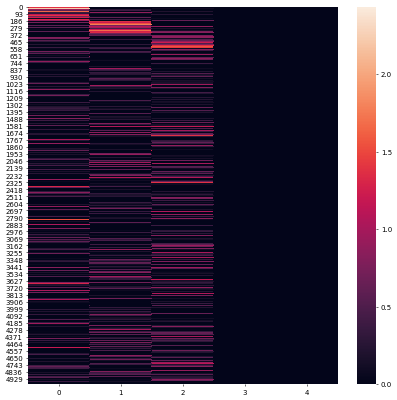

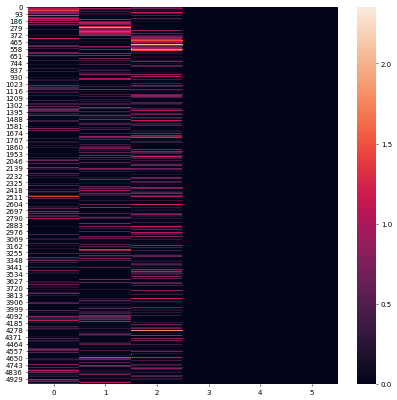

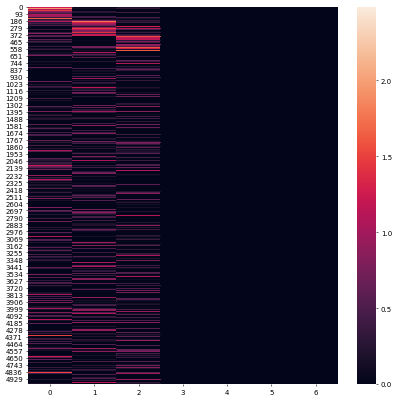

In [133]:
gene_num, loci_num, cell_num = 2000, 5000, 500


def col2row1(col_index: int) -> Iterable[int]:
    n = 200
    coph = 0
    min_ = col_index * (n - coph)
    max_ = min_ + n
    return range(min_, max_)


def col2row2(col_index: int) -> Iterable[int]:
    n = 500
    coph = 0
    min_ = col_index * (n - coph)
    max_ = min_ + n
    return range(min_, max_)


def row2col(shape, c):
    def func(index):
        coph = 0
        min_ = index * (c - coph)
        max_ = min_ + c
        if index < shape[0] - 1:
            return range(min_, max_)
        elif index == shape[0] - 1:
            return range(min_, shape[1])
        raise ValueError
    return func


X1s = []
X2s = []
k2 = 3
lambda1 = 0.05
lambda2 = 0.025
rho1 = 2
rho2 = 1
for k1 in range(3, 8):
    k = max(k1, k2)
    c = 50
    count_h = [c for i in range(k - 1)] + [cell_num - (k - 1) * c]
    W1 = generate_loading_matrix((gene_num, k1), col2row=col2row1)
    W2 = generate_loading_matrix((loci_num, k2), col2row=col2row1)
    W2 = np.concatenate([W2, np.zeros((loci_num, k - k2))], axis=1)
    
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.figure(dpi=50)
    sns.heatmap(W2)
    plt.show()
    
    H = generate_loading_matrix((k, cell_num), row2col=row2col((k, cell_num), c), noise=False)
    X1s.append(generate_data_matrix(W1, H, count_h, rho=rho1, lambda_=lambda1))
    X2s.append(generate_data_matrix(W2, H, count_h, rho=rho2, lambda_=lambda2, threshold=0.7))

## Dataset 4 same transcriptome different epigenome (tune k2)

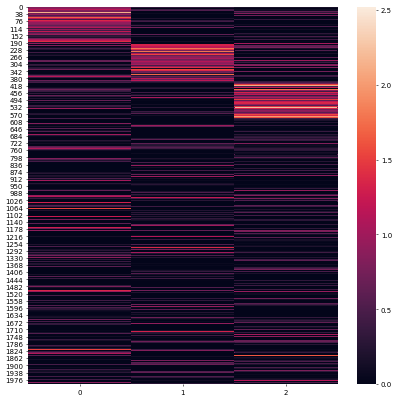

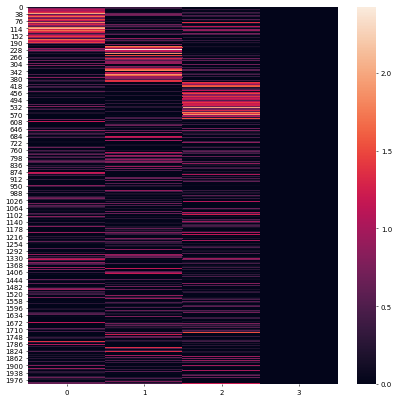

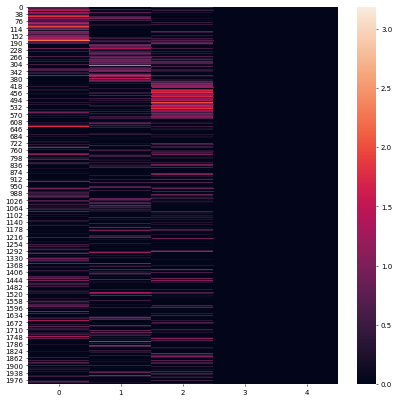

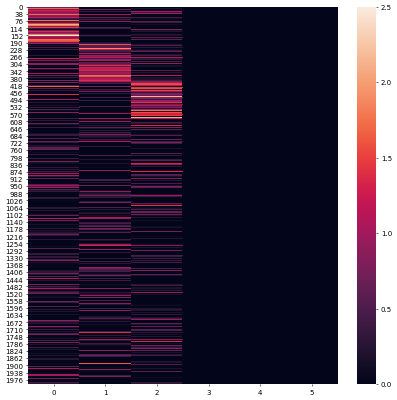

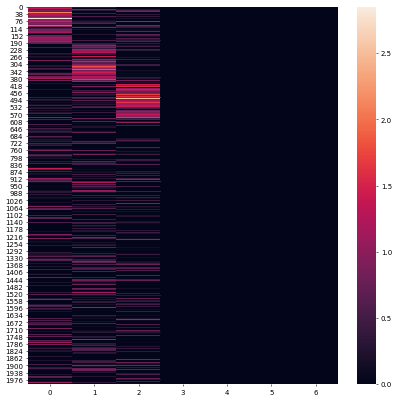

In [136]:
X1s = []
X2s = []
k1 = 3
lambda1 = 0.05
lambda2 = 0.025
rho1 = 2
rho2 = 1
for k2 in range(3, 8):
    k = max(k1, k2)
    c = 50
    count_h = [c for i in range(k - 1)] + [cell_num - (k - 1) * c]
    W1 = generate_loading_matrix((gene_num, k1), col2row=col2row1)
    W2 = generate_loading_matrix((loci_num, k2), col2row=col2row1)
    W1 = np.concatenate([W1, np.zeros((gene_num, k - k1))], axis=1)
    
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.figure(dpi=50)
    sns.heatmap(W1)
    plt.show()
    
    H = generate_loading_matrix((k, cell_num), row2col=row2col((k, cell_num), c), noise=False)
    X1s.append(generate_data_matrix(W1, H, count_h, rho=rho1, lambda_=lambda1))
    X2s.append(generate_data_matrix(W2, H, count_h, rho=rho2, lambda_=lambda2, threshold=0.7))

In [123]:
[(X1 == 0).sum() / (X1.shape[0] * X1.shape[1]) for X1 in X1s]

[0.882462, 0.903584, 0.925599, 0.949673, 0.97404]

In [41]:
(X2 == 0).sum() / (X2.shape[0] * X2.shape[1])

0.9970236842105263

In [88]:
l = [1,2,3]
sum(l[:0])

0

In [123]:
a = np.arange(10).reshape(5, 2)
a.mean()

4.5

In [89]:
b = np.arange(15).reshape(5, 3)
np.concatenate(a, b)

TypeError: only integer scalar arrays can be converted to a scalar index

In [65]:
np.random.binomial(1, 0.5, (2,4))

array([[0, 0, 1, 0],
       [0, 0, 1, 1]])

In [66]:
len(H)

3

In [55]:
isinstance(list(), Sequence)

True

In [60]:
type(np.asarray(W2))
type(W2)

numpy.ndarray

In [58]:
b = [12,4,3]
b[1:2] = 1, 2

In [20]:
a = np.array([])
a.append(np.array([1,2,3]))

AttributeError: 'numpy.ndarray' object has no attribute 'append'